In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [3]:
#Regression Models

#read dataset
df= pd.read_csv(r"C:\Users\USER\Desktop\Regression.csv")
df=pd.DataFrame(df)

#dataset overview
print("dataset info:")
print(df.info())
print('\n',df.describe())
print('\n',df.nunique())

dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Hours_Studied      6607 non-null   int64 
 1   Attendance         6607 non-null   int64 
 2   Sleep_Hours        6607 non-null   int64 
 3   Previous_Scores    6607 non-null   int64 
 4   Tutoring_Sessions  6607 non-null   int64 
 5   Teacher_Quality    6529 non-null   object
 6   Exam_Score         6607 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 361.4+ KB
None

        Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000

In [4]:
#check for and replace the missing values with the most repeated value
print("\n missing values:")
print(df.isnull().sum())

print('\n',df['Teacher_Quality'].value_counts())
df['Teacher_Quality'] = df['Teacher_Quality'].fillna('Medium')
print(df.shape)
print()


 missing values:
Hours_Studied         0
Attendance            0
Sleep_Hours           0
Previous_Scores       0
Tutoring_Sessions     0
Teacher_Quality      78
Exam_Score            0
dtype: int64

 Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
(6607, 7)



In [5]:
# Separate numeric and categorical columns
numeric_columns= df.select_dtypes(include=['int64']).columns
categorical_columns= df.select_dtypes(include=['object']).columns
print("\n numeric columns:", list(numeric_columns))
print(" \ncategorical columns:", list(categorical_columns))
print()

#encode categorical columns
label_encoder= LabelEncoder()
for column in categorical_columns:
    df[column]= label_encoder.fit_transform(df[column])
#encode result
print("\n Encoded DataFrame:")
print(df[categorical_columns].head())


 numeric columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']
 
categorical columns: ['Teacher_Quality']


 Encoded DataFrame:
   Teacher_Quality
0                2
1                2
2                2
3                2
4                0


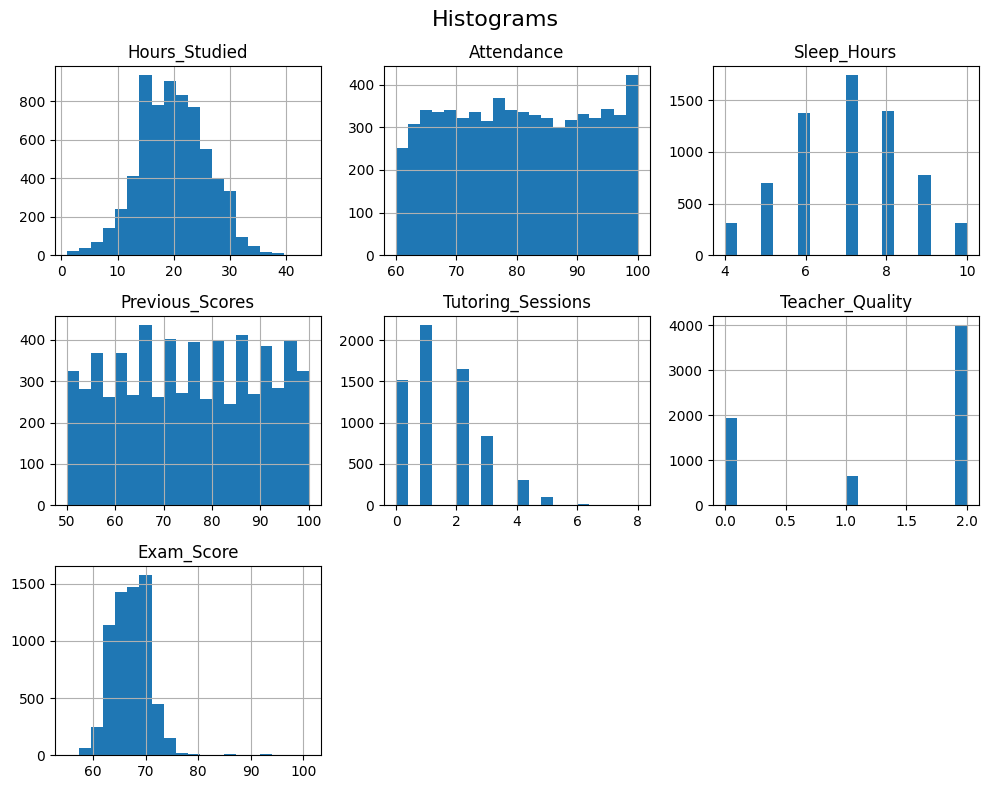


 correlation with target:
 Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Sleep_Hours         -0.017022
Teacher_Quality     -0.060824
Name: Exam_Score, dtype: float64


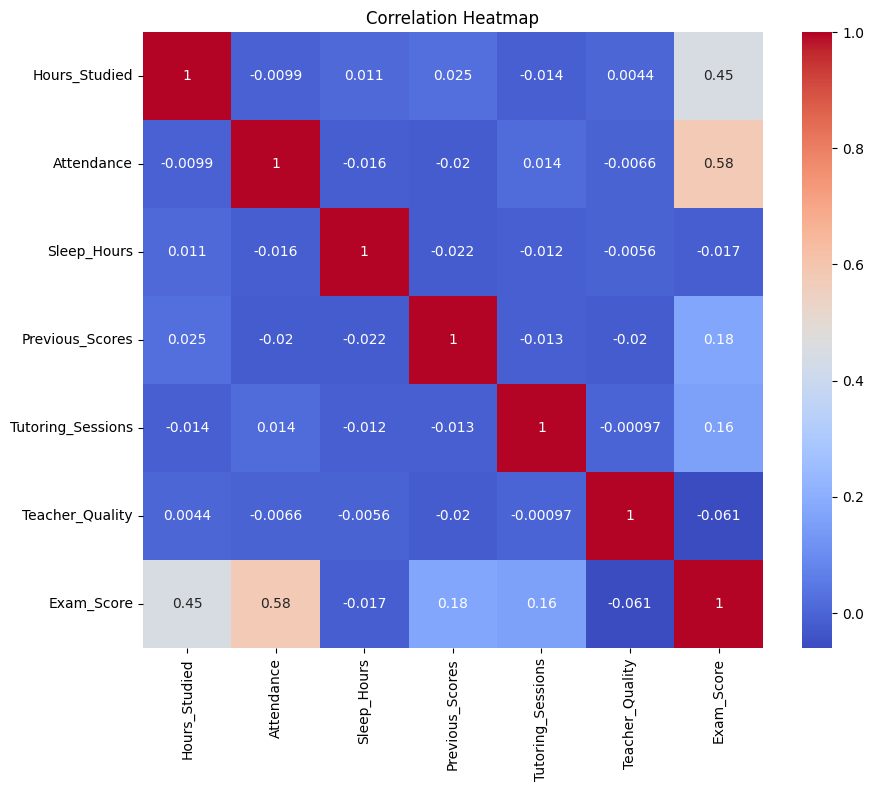

In [6]:
#Histogram of numeric features
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms", fontsize=16)
plt.tight_layout()
plt.show()

#correlation
correlation= df.corr()['Exam_Score'].sort_values(ascending=False)
print("\n correlation with target:\n", correlation)

#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot= True)
plt.title("Correlation Heatmap")
plt.show()


 (6559, 7)


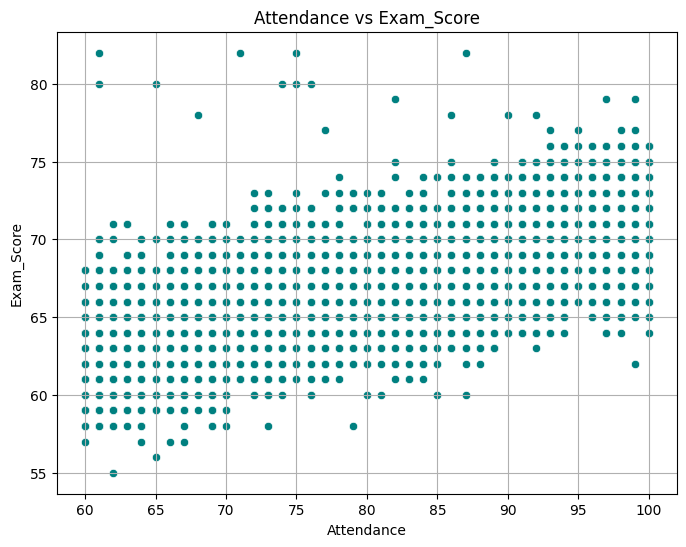

In [7]:
# get rid of the Outliers
z = np.abs((df - df.mean()) / df.std())
threshold = 4
df= df[(z < threshold).all(axis=1)]
print('\n',df.shape)

#scatter plot of 'Attendance' vs 'Exam_Score'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Attendance', y='Exam_Score', color='teal')
plt.title(f'{'Attendance'} vs {'Exam_Score'}')
plt.xlabel('Attendance')
plt.ylabel('Exam_Score')
plt.grid(True)
plt.show()

In [8]:
#defining
X= df.drop('Exam_Score',axis=1)
y= df['Exam_Score']

#Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[['Attendance']])

#Train test split (80/20)
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\n Shapes:\nX_train: {X_train.shape}, X_test: {X_test.shape}")

X_test_original = scaler.inverse_transform(X_test)


 Shapes:
X_train: (5247, 1), X_test: (1312, 1)



simple Regression Metrics:
R² Score: 0.4467819890402729
MSE: 6.384300795266396


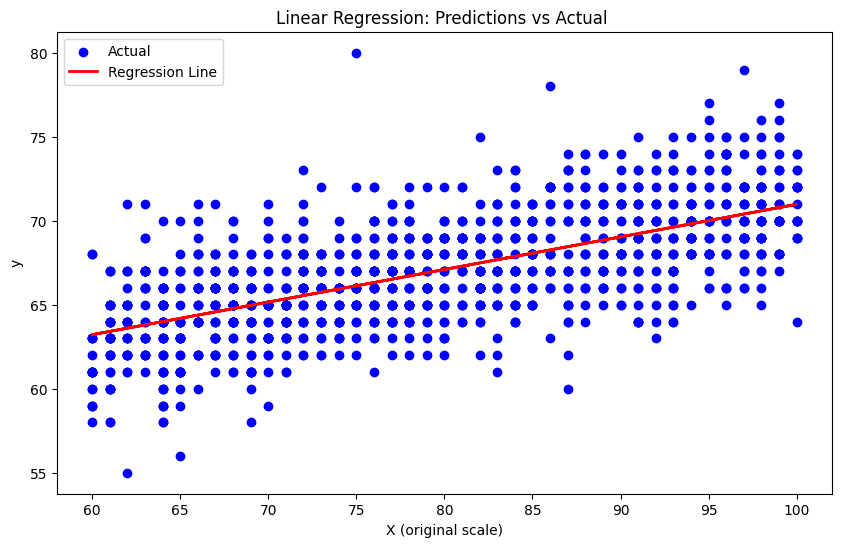

In [9]:
# simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
r2 = r2_score(y_test, lr_pred)
mse = mean_squared_error(y_test,lr_pred)
print("\nsimple Regression Metrics:")
print(f"R² Score: {r2}")
print(f"MSE: {mse}")

# Plot for Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test_original, y_test, color='blue', label='Actual')
plt.plot(X_test_original, lr_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X (original scale)')
plt.ylabel('y')
plt.title('Linear Regression: Predictions vs Actual ')
plt.legend()
plt.show()

In [10]:
# Multiple Linear Regression
scaler = MinMaxScaler()
X_scaled_multi = scaler.fit_transform(X)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_scaled_multi, y, test_size=0.2, random_state=42)
print(f"\n Shapes:\nX_train: {X_train_multi.shape}, X_test: {X_test_multi.shape}")


lr = LinearRegression()
lr.fit(X_train_multi, y_train_multi)
lr_pred = lr.predict(X_test_multi)
multi_r2 = r2_score(y_test_multi, lr_pred)
multi_mse = mean_squared_error(y_test_multi,lr_pred)
print("\nMultiple Regression Metrics:")
print(f"R² Score: {multi_r2}")
print(f"MSE: {multi_mse}")
print()


 Shapes:
X_train: (5247, 6), X_test: (1312, 6)

Multiple Regression Metrics:
R² Score: 0.8034153757096564
MSE: 2.268645178447293




Polynomial Regression Metrics:
Degree 2:  R²: 0.44719569153216177, MSE: 6.379526545159484
Degree 3:  R²: 0.44647829207256984, MSE: 6.387805548824696
Degree 4:  R²: 0.4465991994719126, MSE: 6.386410241386243


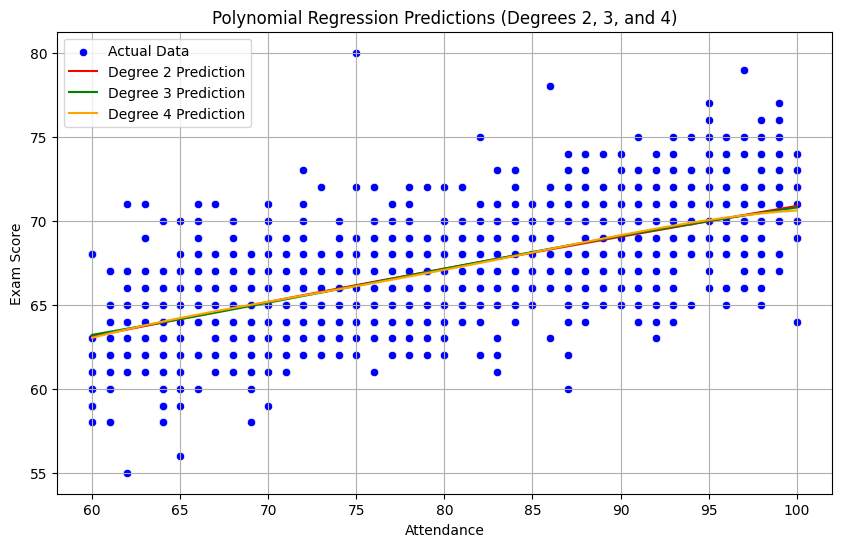

In [11]:
# Polynomial Regression
# Degree 2
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)
lr.fit(X_train_poly2, y_train)
y_pred2 = lr.predict(X_test_poly2)
r2_2 = r2_score(y_test, y_pred2)
mse_2 = mean_squared_error(y_test, y_pred2)

# Degree 3
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)
lr.fit(X_train_poly3, y_train)
y_pred3 = lr.predict(X_test_poly3)
r2_3 = r2_score(y_test, y_pred3)
mse_3 = mean_squared_error(y_test, y_pred3)

# Degree 4
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)
X_test_poly4 = poly4.transform(X_test)
lr.fit(X_train_poly4, y_train)
y_pred4 = lr.predict(X_test_poly4)
r2_4 = r2_score(y_test, y_pred4)
mse_4 = mean_squared_error(y_test, y_pred4)

print("\nPolynomial Regression Metrics:")
print(f"Degree 2:  R²: {r2_2}, MSE: {mse_2}")
print(f"Degree 3:  R²: {r2_3}, MSE: {mse_3}")
print(f"Degree 4:  R²: {r2_4}, MSE: {mse_4}")

# Plot all predictions in one frame
plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_test_original.flatten(), y=y_test, color='blue', label='Actual Data')

sns.lineplot(x=X_test_original.flatten(), y=y_pred2, color='red', label='Degree 2 Prediction')
sns.lineplot(x=X_test_original.flatten(), y=y_pred3, color='green', label='Degree 3 Prediction')
sns.lineplot(x=X_test_original.flatten(), y=y_pred4, color='orange', label='Degree 4 Prediction')
plt.title('Polynomial Regression Predictions (Degrees 2, 3, and 4)')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Logistic Regression with Classification
df = pd.read_csv(r"C:\Users\USER\Desktop\Logistic Regression.csv")
print('\n',df.info())
print('\n',df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

 None

                  age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593      


 Numeric Columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
 
Categorical Columns: ['gender', 'smoking_history']


 Encoded DataFrame:
   gender  smoking_history
0       0                4
1       0                0
2       1                4
3       0                1
4       1                1

 Correlation with target:
 diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
smoking_history        0.094290
gender                 0.037411
Name: diabetes, dtype: float64


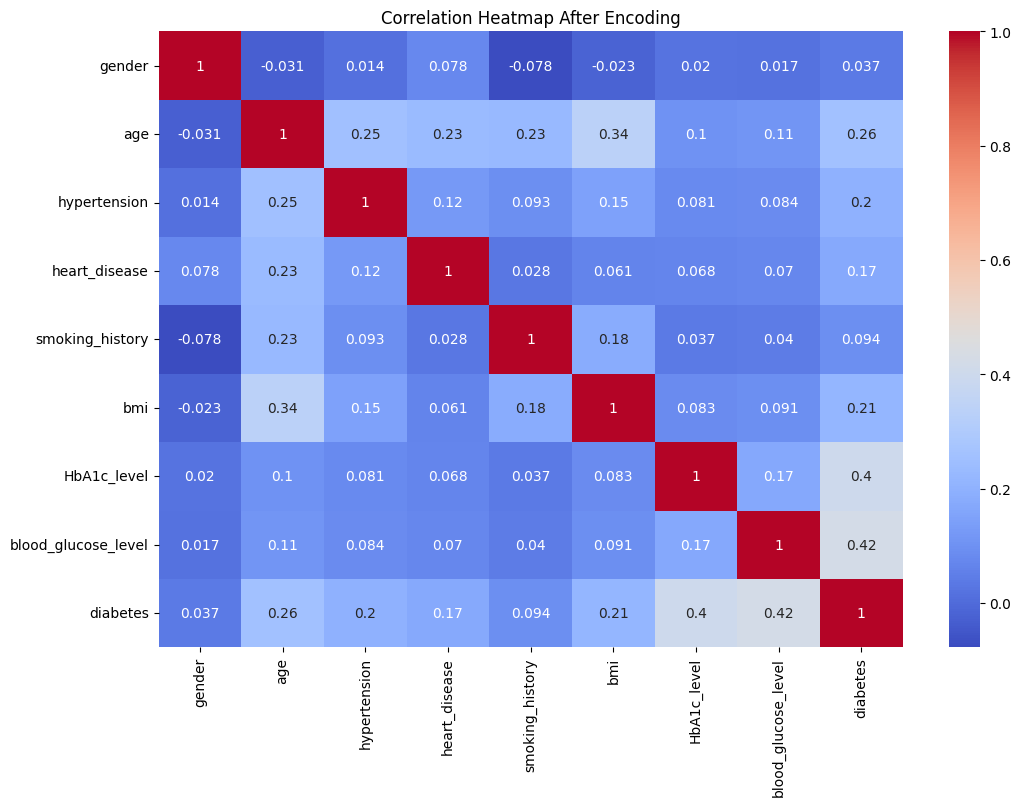


 (95691, 9)


In [13]:
# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int64']+['float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\n Numeric Columns:", list(numeric_columns))
print(" \nCategorical Columns:", list(categorical_columns))
print()

#Encode
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
#encode result
print("\n Encoded DataFrame:")
print(df[categorical_columns].head())

#correlation
correlation = df.corr()['diabetes'].sort_values(ascending=False)
print("\n Correlation with target:\n", correlation)
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot= True)
plt.title("Correlation Heatmap After Encoding")
plt.show()

# get rid of the Outliers
z = np.abs((df - df.mean()) / df.std())
threshold = 4
df= df[(z < threshold).all(axis=1)]
print('\n',df.shape)


 Shapes:
X_train: (76552, 8), X_test: (19139, 8)


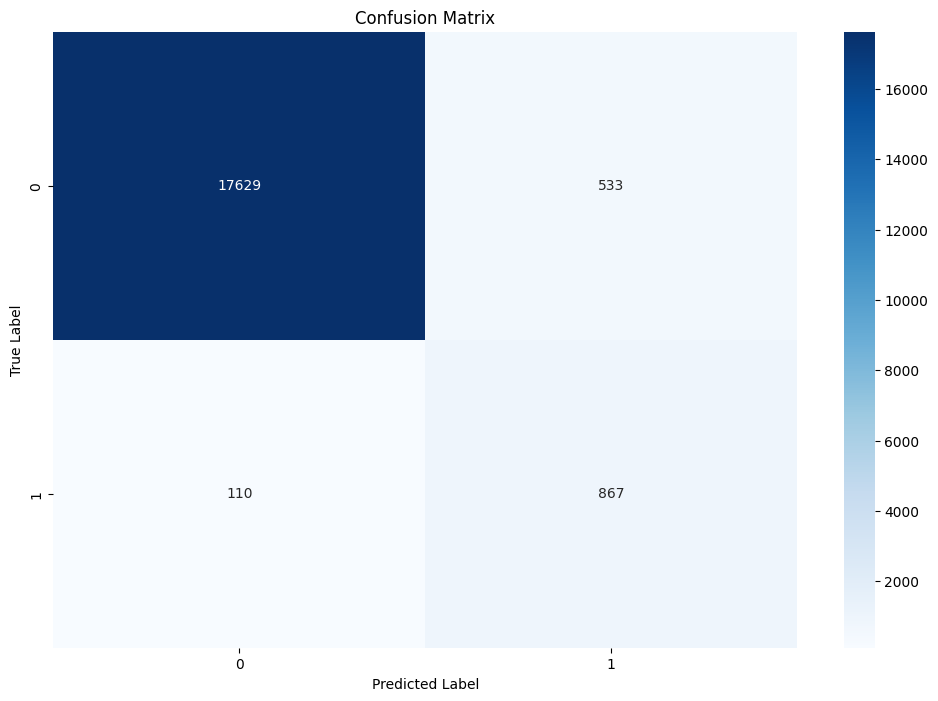

In [16]:
X = df.drop(columns = ["diabetes"])
Y = df["diabetes"]

#Scale the features
scaler = MinMaxScaler()
X_scaled_log = scaler.fit_transform(X)

#Train test split (80/20)
x_train, x_test, y_train, y_test = train_test_split(X_scaled_log, Y, test_size=0.2, shuffle=True, random_state= 42)
print(f"\n Shapes:\nX_train: {x_train.shape}, X_test: {x_test.shape}")

# Logistic Regression
log_r = LogisticRegression()
log_r.fit(x_train, y_train)
log_pred = log_r.predict(x_test)

# confusion matrix
cm = confusion_matrix(log_pred, y_test)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [1]:
#   summary of my findings:

#  Data Overview:
# - Both the classification and regression data were loaded and explored.
# - Missing values were Handled by replacing them with the most frequent category.
# - The categorical features were encoded to get them into model compatible form.
# - Outliers were removed using the assistance of z-score filtering and threshold 4.
# - Utilized MinMaxScaler for feature scaling.

#  Regression Analysis:
# - Implemented Simple Linear Regression using 'Attendance' as the predictor.
# - Used all features to implement Multiple Linear Regression and it improved performance over simple regression.
# - Had Used Polynomial Regression for degrees 2, 3, and 4.
# - Polynomial Regression (Degree 4) had the best performance both in R² and MSE.
# - Feature scaling, outlier removal, and encoding significantly improved the reliability of the model.

# Visual Insights:
# - The scatter plots showed a clear relationship between attendance and exam marks.
# - The polynomial regression curves visually displayed non-linear trends more effectively than linear trends.
# - Heatmaps produced strong correlation insights between encoded features.

#  Logistic Regression :
# - Loaded and cleaned a different dataset for diabetes classification.
# - Logistic regression provided an easy baseline for binary classification problems.

print('thanks')

thanks
